# Growth Rates of Sequences
© Kelly McQuighan 2017

## Introduction
The purpose of this notebook is to introduce the idea of growth rates of infinite sequences. Recall that an infinite sequence is an ordered collection of points and is denoted $\{a_n\}_{n=1}^\infty$, where $a_n$ can be defined **recursively** as in the famous Fibonacci sequence $a_n = a_{n-1}+a_{n-2}$ (leading to the sequence $\{1,1,2,3,5,8,13,\ldots\}$) or **explicitly** as in $a_n=\frac1n$ (leading to the Harmonic sequence $\left\{1,\frac12,\frac13,\frac14,\frac15,\ldots\right\}$).

Let's say you have two infinte sequences $\{a_n\}_{n=1}^\infty$ and $\{b_n\}_{n=1}^\infty$, for example, $a_n = 100n$ and $b_n = n^2$. One question we might ask is: "Which is larger: $\{100n\}$ or $\{n^2\}$?" For a fixed $n$ this is easy to answer: $a_1 > b_1$, $a_2 > b_2$, and so on until $a_{10}=b_{10}$, $a_{11}<b_{11}$, and so on. The fact that the inequality flips at $n=10$ means that the question "which sequence is larger" in this pointwise-sense does not really make sense. In general there is no reason to believe that an ordering $a_n > b_n$ will be true for all $n$ (or vice versa). 

The problem was with focusing on the *value* of each term in the sequences. Instead we want to consider the **growth rate** of the terms. So, in my example, $\{b_n\}$ has a faster growth rate than $\{a_n\}$ (denoted by $\{100n\} << \{n^2\}$) since once $b_n = n^2$ overtakes $a_n = 100n$ (at $n=10$), $a_n$ will never catch up again. We denote the fact that $b_n$ has a faster growth rate than $a_n$ by writing .

In this Notebook we're specifically interested in the relative growth rates of the following important sequences: $\{\ln^q n\}$, $\{n^p\}$, $\{n^{p+s}\ln^r n\}$, $\{b^n\}$, $\{n!\}$, and $\{n^n\}$ where $p$, $q$, $r$, and $s>0$ and $b>1$. 

## Set-up
The simulations in this notebook rely on Python code. To initialize the notebook select **Cell->Run All Below**.

Use the simulation below to try to determine the relative growth rates of each of the sequences. I recommend that you only investigate at most three at a time. The initial settings are pretty good but you'll want to keep the following things in mind as you experiment:

- $\ln n < n$ for all integers $n$ and so it is always true that $\ln^q n < n^p$ whenever $q\le p$. Therefore you will want to specifically investigate whether or not this relationship remains true for $q>p$
- For a similar reason when comparing $n^p\ln^r n$ with $n^{p+s}$ we really only need to study $r>s$ (in fact, this case is the exact same as comparing $\ln^r$ with $n^s$ once you factor our $n^p$)
- For $b$ large and $p$ small you should be able to convince yourself at $b^n>n^p$ for all $n$ (try for example $b=1000$ and $p=1$). Therefore, in comparing $b^n$ and $n^p$ we only need to test the relative growth rates for $b$ very **close to 1** and $p$ large.
- For $b$ close to 1 you should be able to convince yourself that $b^n<n!$ and $b^n<n^n$ (try for example $b=2$; then these relationships are true for all $n\ge4$). Therefore, in comparing $b^n$ with $n!$ and $n^n$ we only need to test what happens for $b$ very **large**
- In all cases make sure that the relationship you observe remains true for as you increase $n$. For many choices of $q$, $p$, $r$, $s$, and $b$ it is possible that you will not observe the true growth rate relationship until $n$ gets very, very large. This is why in practice mathematicians use limits (see the **Final Comments** section below).

In [1]:
from ipywidgets import interactive, Text, IntSlider, FloatSlider, Checkbox, Label,HBox, VBox, Box, Layout
import ipywidgets as widgets
%matplotlib inline
import GrowthRateTools as GRT
items_layout = Layout(flex = '1 1 auto', width='auto',
                      justify_content = 'space-around',align_content='space-around',
                      align_items='center')
items_layout2 = Layout(flex = '1 1 auto', width='100%',
                       justify_content = 'flex-end')
box_layout = Layout(display='flex', justify_content = 'flex-start', 
                    align_content='flex-start', width = '100%')

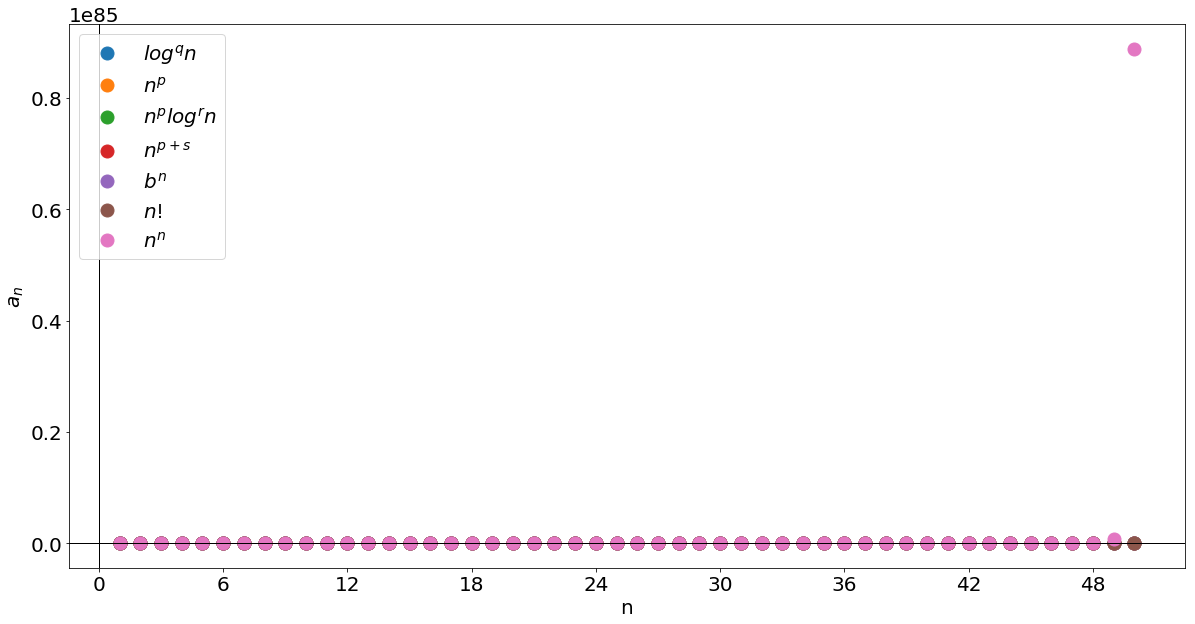

In [3]:
#DO NOT CHANGE ANYTHING IN THIS BOX
reload(GRT)
log_box = Checkbox(value=False,layout=items_layout,description=" ")
power_box = Checkbox(value=False,layout=items_layout,description=' ')
log_power_box = Checkbox(value=False,layout=items_layout,description=" ")
power_box2 = Checkbox(value=False,layout=items_layout,description=' ')
exp_box = Checkbox(value=False,layout=items_layout,description=' ')
factorial_box = Checkbox(value=False,layout=items_layout,description=' ')
power_exp_box = Checkbox(value=False,layout=items_layout,description=' ')
q_slider = FloatSlider(min=0.1, max=3., step=0.1, value=2.8,
                       layout=items_layout2, description='$q$')
p_slider = FloatSlider(min=1., max=4., step=0.1, value=1.0,
                       layout=items_layout2, description='$p$')
r_slider = FloatSlider(min=0.1, max=3., step=0.1, value=0.1,
                       layout=items_layout2, description='$r$')
s_slider = FloatSlider(min=1., max=4., step=0.1, value=1.,
                       layout=items_layout2, description='$s$')
b_slider = FloatSlider(min=1.5, max=10., step=0.5, value=1.5,
                       layout=items_layout2, description='$b$')
ymax_slider = FloatSlider(min=1.5, max=10., step=0.5, value=1.5,
                       layout=items_layout2, description='$b$')
n_slider = IntSlider(min=5, max=100, step=5, value=50,
                     layout=items_layout2,description=r'$n$')
interactive(GRT.compare_rates, show_log=log_box,show_power=power_box,
                              show_log_power=log_power_box, show_power2=power_box2,show_exp=exp_box,
                              show_factorial=factorial_box,show_power_exp = power_exp_box,
           q=q_slider,p=p_slider,r=r_slider,s=s_slider,b=b_slider,n_max=n_slider,y_max=ymax_slider)
VBox([HBox([Label(value='Display:',layout=items_layout),
            HBox([Label(value="$\ln^q n$",layout=items_layout2),log_box],layout=items_layout2), 
            HBox([Label(value="$n^p$",layout=items_layout2),power_box],layout=items_layout2),
            HBox([Label(value="$n^p\ln^r n$",layout=items_layout2),log_power_box],layout=items_layout2),
            HBox([Label(value="$n^{p+s}$",layout=items_layout2),power_box2],layout=items_layout2),
            HBox([Label(value="$b^n$",layout=items_layout2),exp_box],layout=items_layout2),
            HBox([Label(value=r"$n!$",layout=items_layout2),factorial_box],layout=items_layout2),
            HBox([Label(value="$n^n$",layout=items_layout2),power_exp_box],layout=items_layout2)]),
      HBox([q_slider,p_slider,r_slider]),
      HBox([s_slider,b_slider,n_slider])],layout=box_layout)

## Final comments
In your numerical investiations you should have found that
$$
\{\ln^q n\}<<\{n^p\}<<\{n^p\ln^r n\}<<\{n^{p+s}\}<<\{b^n\}<<\{n!\}<<\{n^n\} 
$$

In order to rigorously prove that this is true mathematicians use limits. The mathematical definition of a growth rate is as follows:

**Definition (Growth Rates of Sequences)**

*Suppose $\{a_n\}_{n=1}^\infty$ and $\{b_n\}_{n=1}^\infty$ are infinite sequences with $\lim_{n\to\infty} a_n = \lim_{n\to\infty}b_n = \infty$. Then $\{b_n\}$ **grows faster** than $\{a_n\}$ if
$$
\lim_{n\to\infty}\frac{b_n}{a_n} = \infty \qquad\textit{or, equivalently, if}\qquad \lim_{n\to\infty}\frac{a_n}{b_n} = 0.
$$
In this case we denote $\{a_n\}<<\{b_n\}$.
The sequences $a_n$ and $b_n$ are said to have **comparable growth rates** if 
$$
\lim_{n\to\infty} \frac{a_n}{b_n} = M
$$
for some $0<M<\infty$. In this case we denote $\{b_n\}\sim\{a_n\}$.*

For example: $a_n = 10n$ and $b_n = 100n$ have comparable growth rates even though $b_n > a_n$ for all $n$ since $\lim_{n\to\infty}\frac{b_n}{a_n} = 10$ but $a_n = 100n$ grows slower than $b_n =n^2$ since 
$$\lim_{n\to\infty}\frac{a_n}{b_n} = \lim_{n\to\infty}\frac{100n}{n^2} = \lim_{n\to\infty}\frac{100}{n} = 0.$$ 
You might want to spend some time convincing yourself that this definition captures the growth rate information that we're interested in.

Evaluating the limits in the definition of growth rates often relies on l'Hopital's rule, which I recall here for completeness.

**Theorem (l'Hopital's Rule)**

*Let $f(x)$ and $g(x)$ be differentiable functions. If $\lim_{x\to\infty} f(x) = \infty$ and $\lim_{x\to\infty}g(x) = \infty$ then
$$
\lim_{x\to\infty}\frac{f(x)}{g(x)} = \lim_{x\to\infty}\frac{f'(x)}{g'(x)}.
$$
*

We also use the following fact:

**Theorem (Convergence of Infinite Sequence)**

*Let $\{a_n\}_{n=1}^\infty$ be an explicitly defined infinite sequence so that $a_n = f(n)$ for some function $f(x)$. If $\lim_{x\to\infty} f(x) = L$ (so that $f(x)$ converges) then $\lim_{n\to\infty} a_n = L$ as well. *

We are now ready to prove the growth rates. For simplicity I will assume that $p$, $q$, $s$, and $r$ are integers. Very slight modifications are needed to handle the general case.

### Ex: $\{\ln^q n\} << \{n^p\}$
\begin{align}
\lim_{n\to\infty}\frac{\ln^q n}{n^p} &\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{\frac1n\cdot q\ln^{q-1} n}{pn^{p-1}}\stackrel{rearrange}{=} \lim_{n\to\infty}\frac{q\ln^{q-1}}{pn^p}\\
&\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{\frac1n\cdot q(q-1)\ln^{q-2} n}{p^2n^{p-1}}\stackrel{rearrange}{=} \lim_{n\to\infty}\frac{q(q-1)\ln^{q-2}}{p^2n^p}\\
&\vdots\text{ (q times total)}\\
&\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{\frac1n\cdot q!\ln^{0} n}{p^qn^{p-1}}\stackrel{rearrange}{=} \frac{q!}{p^q}\lim_{n\to\infty}\frac1{n^p}=0
\end{align}

This same result also shows that $n^p\ln^r n<<n^{p+s}$ by factoring out the $n^p$ term from both sides (use the fact that $n^{p+s} = n^p\cdot n^s$). The fact that $\ln n > 1$ for $n>3$ shows $n^p<<n^p\ln^r n$.  Altogether these results give us
$$
\{\ln^q n\}<<\{n^p\}<<\{n^p\ln^r n\}<<\{n^{p+s}\}
$$

### Ex: $\{n^{p+s}\}<<\{b^n\}$
For simplicity of notation I'll just write $n^t$ instead of $n^{p+s}$ (letting $t=p+s$). 

\begin{align}
\lim_{n\to\infty}\frac{n^t}{b^n} &\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{tn^{t-1}}{\ln b\cdot b^n}\\
&\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{t(t-1)n^{t-2}}{\ln^2 b\cdot b^n}\\
&\vdots\text{ (t times total)}\\
&\stackrel{l'Hopital}{=} \lim_{n\to\infty}\frac{t!n^{0}}{\ln^t b\cdot b^n} =\frac{t!}{\ln^t b}\lim_{n\to\infty} \frac1{b^n}= 0
\end{align}

### Remaining relationships
The remaining relationships rely on the Squeeze Theorem

**Theorem (Squeeze Theorem)**

*
Let $\{a_n\}$, $\{b_n\}$, and $\{c_n\}$ be sequences such that $a_n\le b_n\le c_n$ for all $n$ large enough. Also suppose that
$$
\lim_{n\to\infty} a_n = \lim_{n\to\infty} c_n = L.
$$
Then $\lim_{n\to\infty} b_n = L.$
*

The trick to using the Squeeze Theorem is to choose good comparison sequences $\{a_n\}$ and $\{c_n\}$. In all of the remaining growth rate limits we will choose $a_n=0$ so that $\lim_{n\to\infty} a_n = 0$ is trivial.

- To show $\lim_{n\to\infty}\frac{b^n}{n!} = 0$: Use $c_n = \left(\frac b{b+1}\right)^{n-b}\cdot\frac bb\cdot \frac b{b-1}\cdots \frac b2\cdot \frac b1$ and the fact that $\frac{b^n}{n!} = \frac bn\cdot\frac b{n-1}\cdots\frac b2\cdot \frac b1 < c_n $ for all $n\ge b+1$

- To show $\lim_{n\to\infty} \frac{n!}{n^n} = 0$: Use $c_n = \frac 1n$ and the fact that $\frac{n!}{n^n} = \frac nn\cdot\frac{n-1}n\cdots \frac2n\cdot \frac1n<c_n$

Altogether these give the ordering $\{b^n\}<<\{n!\}<<\{n^n\}$. 